In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from cmcrameri import cm
import pandas as pd
import numpy as np
import pickle

### Load data

In [2]:
df_neuron = pd.read_pickle('../../../data/data_tables/df_classifier.pkl')
df_morphos = pd.read_pickle('../../../data/data_tables/df_morphos.pkl')

df_neuron = pd.merge(
    df_neuron,
    df_morphos[
        [
            'segment_id',
            'split_index',
            'soma_x_align',
            'soma_y_align',
            'soma_z_align',
            'exclude',
        ]
    ],
    on=['segment_id', 'split_index'],
)

In [3]:
df_neuron = df_neuron[~df_neuron.assigned_layer.isna()]
df_neuron = df_neuron[~df_neuron.exclude]

In [4]:
soma_centers = np.stack(
    df_neuron[['soma_x_align', 'soma_y_align', 'soma_z_align']].values
)
soma_layer_labels = np.stack(df_neuron.assigned_layer.values)

In [5]:
area_bounds = np.load('../../../data/volume/area_bounds.npy')

In [6]:
with open('../../../data/volume/layer_bounds.pkl', 'rb') as f:
    layer_bounds = pickle.load(f)

In [7]:
pia = np.load('../../../data/volume/pia.npy')
wm = np.load('../../../data/volume/wm.npy')

#### Mean layer depth

In [12]:
for layer in ['L23/L4', 'L4/L5', 'L5/L6']:
    print(layer, layer_bounds[layer][:, :, 1].mean(axis=(0, 1)))

L23/L4 227.0803255966257
L4/L5 340.4965425454182
L5/L6 488.89430604352106


In [13]:
wm[:, 1].mean()

693.0190483816842

In [14]:
layer_color_dict = dict(
    {
        'L23': cm.batlow.colors[0],
        'L4': cm.batlow.colors[50],
        'L5': cm.batlow.colors[100],
        'L6': cm.batlow.colors[150],
    }
)
soma_layer_colors = [layer_color_dict[s] for s in soma_layer_labels]

#### Plot

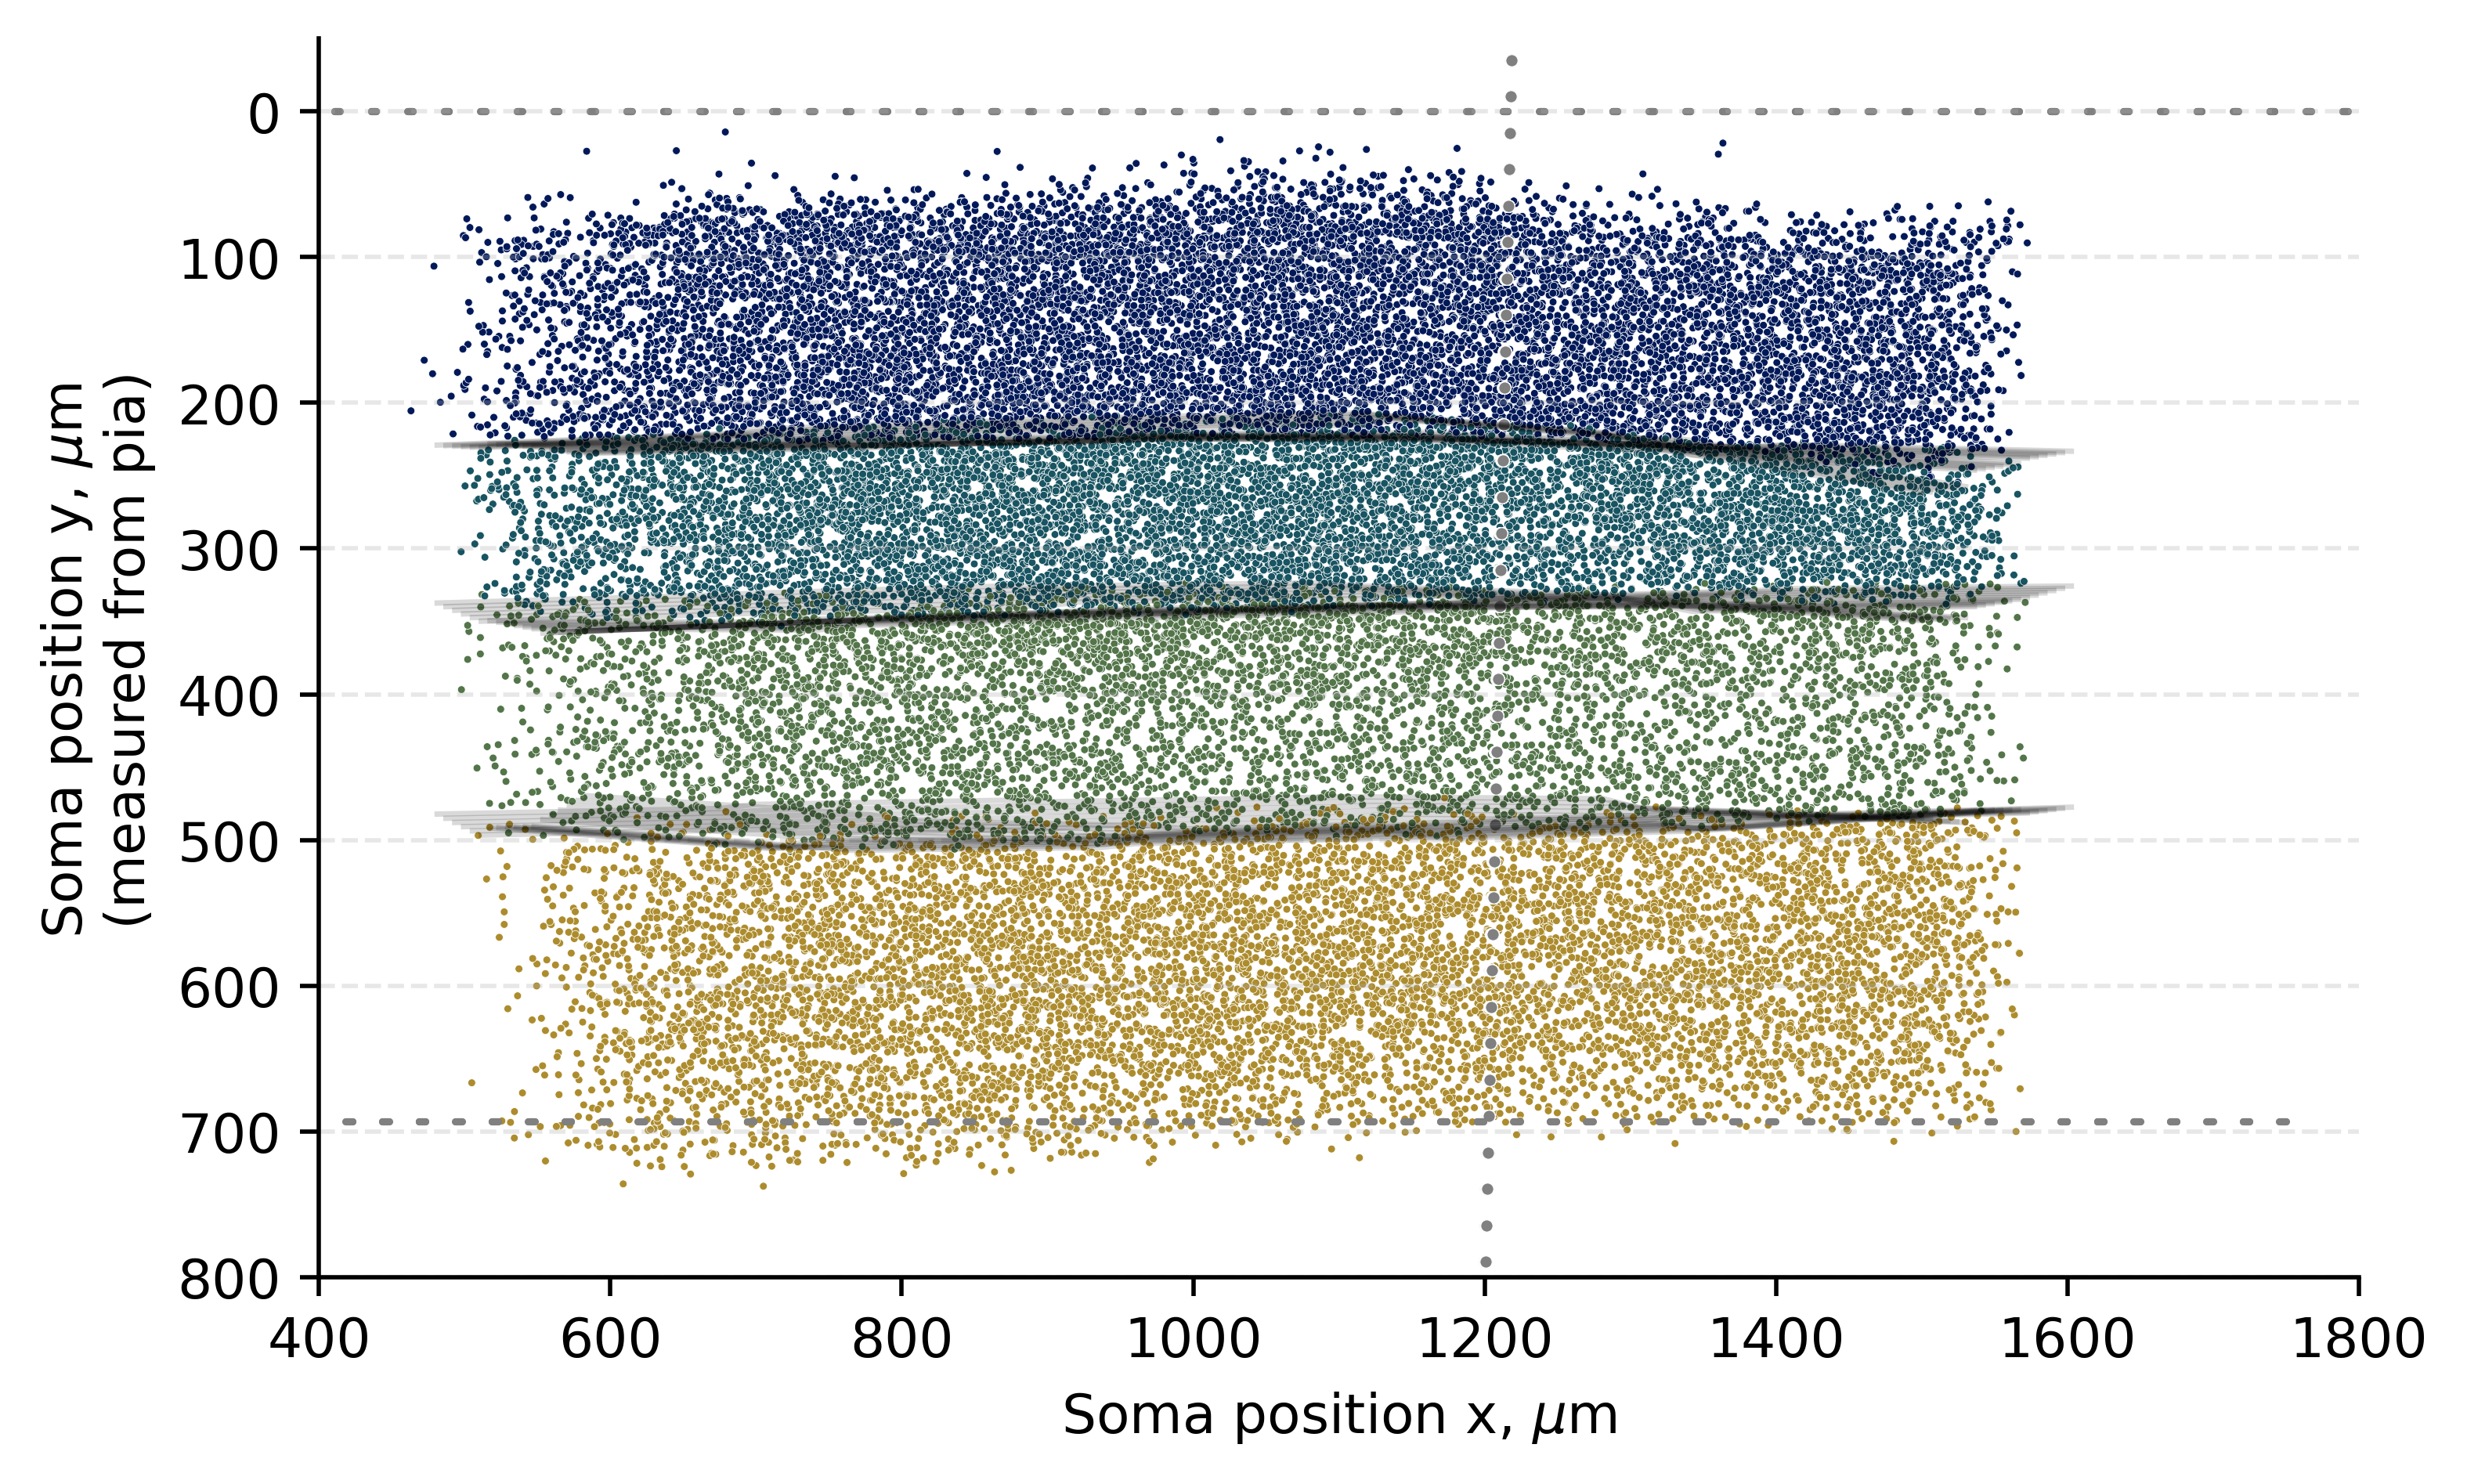

In [15]:
fig, ax = plt.subplots(dpi=500)

# Plot soma centroids colored by assigned cortical layer.
sns.scatterplot(
    x=soma_centers[:, 0], y=soma_centers[:, 1], ax=ax, c=soma_layer_colors, s=2
)

# Plot area bounds.
sns.scatterplot(x=area_bounds[:, 0], y=area_bounds[:, 1], ax=ax, c='gray', s=5)

# Plot layer bounds.
lw = 1
for layer in ['L23/L4', 'L4/L5', 'L5/L6']:
    for line in layer_bounds[layer]:
        ax.plot(*line[:, [0, 1]].T, color='k', lw=lw, alpha=0.15)

# Plot pia and white matter.
s = 0.1
ax.scatter(*pia[:, [0, 1]].T, s=s, color='gray')
ax.scatter(*wm[:, [0, 1]].T, s=s, color='gray')

ax.invert_yaxis()
ax.set_aspect('equal')
fig.set_tight_layout('tight')
ax.set_ylim(800, -50)
ax.set_xlim(400, 1800)
ax.set_xlabel('Soma position x, $\mu$m')
ax.set_ylabel('Soma position y, $\mu$m \n (measured from pia)')
ax.grid(axis='y', alpha=0.3, linestyle='--')
sns.despine()
# fig.savefig('figures/cortical_layers.pdf', bbox_inches='tight', transparent=True)